# 📊 Daily Household Transactions Analysis
This notebook performs data cleaning and visualization on a household's daily transaction dataset.

**Objective:** Understand income and expense patterns, categorize spending, and visualize trends using Pandas, Matplotlib, and Seaborn.
---

## 📦 Step 1: Import Required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Suppress FutureWarnings

# Set seaborn theme
sns.set_theme(style='whitegrid', palette='Set2')

## 🧹 Step 2: Load and Clean the Data

In [4]:
df = pd.read_csv("Daily Household Transactions.csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.drop_duplicates()
df = df[df['Amount'] >= 0]

# Fill missing values
df['Category'] = df['Category'].fillna("Unknown")
df['Subcategory'] = df['Subcategory'].fillna("Unknown")
df['Mode'] = df['Mode'].fillna("Unknown")
df['Note'] = df['Note'].fillna("No Description")
df['Income/Expense'] = df['Income/Expense'].fillna("Unknown")

### 🔢 1. Total Transactions by Type

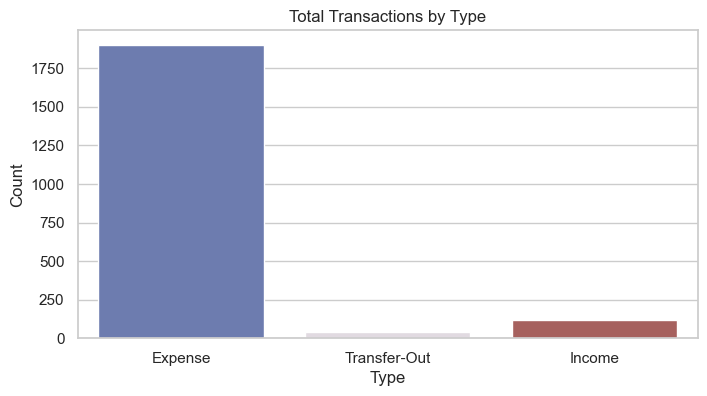

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Income/Expense', palette='twilight_shifted')
plt.title("Total Transactions by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

### 📈 2. Daily Expense Trend

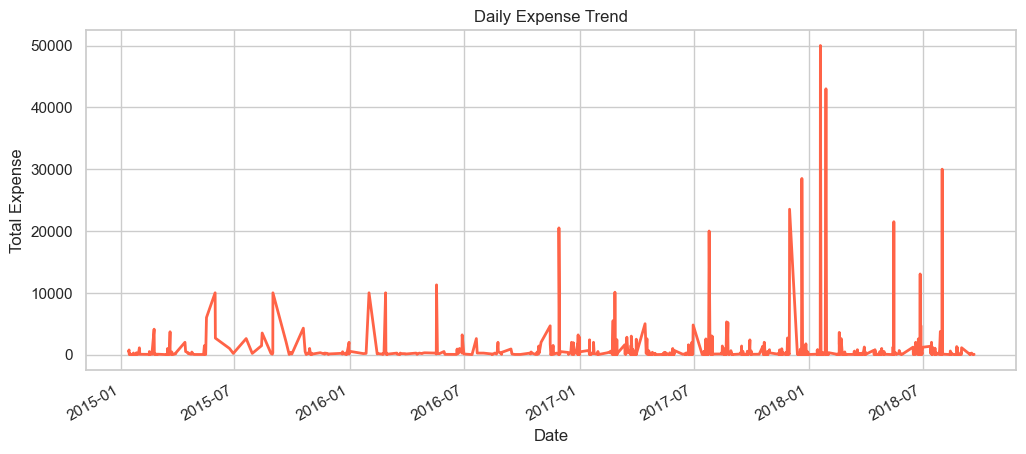

In [6]:
daily_expense = df[df['Income/Expense'] == 'Expense'].groupby('Date')['Amount'].sum()
plt.figure(figsize=(12,5))
daily_expense.plot(color='tomato', linewidth=2)
plt.title("Daily Expense Trend")
plt.xlabel("Date")
plt.ylabel("Total Expense")
plt.grid(True)
plt.show() 

### 🗓️ 3. Monthly Expense Overview

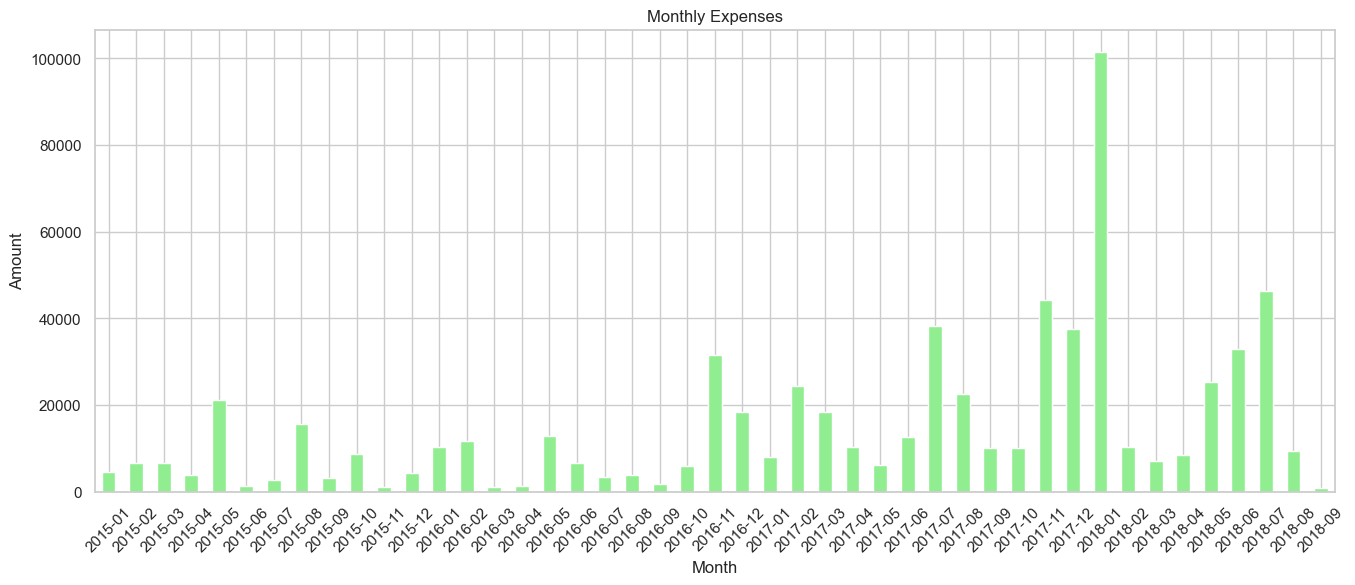

In [24]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_expense = df[df['Income/Expense'] == 'Expense'].groupby('Month')['Amount'].sum()
plt.figure(figsize=(16,6))
monthly_expense.plot(kind='bar', color='lightgreen')
plt.title("Monthly Expenses")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

### 💸 4. Top 10 Categories by Frequency

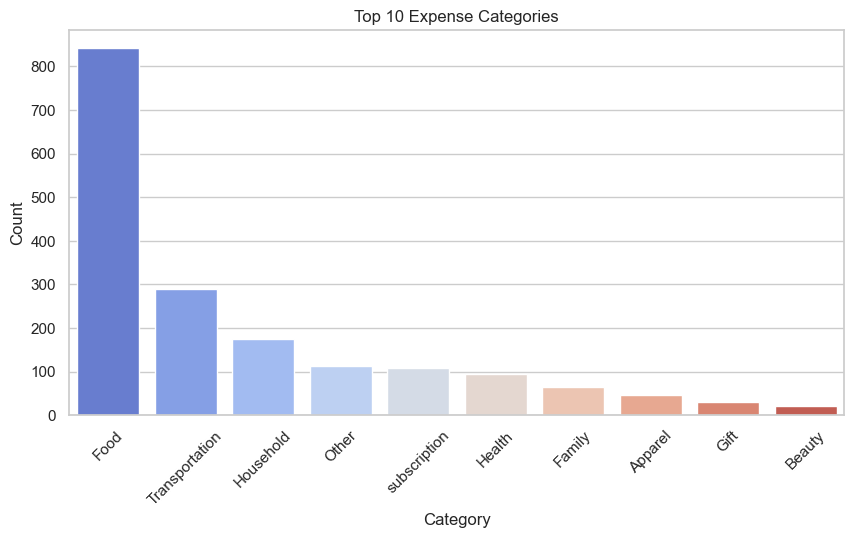

In [6]:
top_cats = df[df['Income/Expense']=='Expense']['Category'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cats.index, y=top_cats.values, palette='coolwarm')
plt.title("Top 10 Expense Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 💳 5. Mode of Payment Distribution

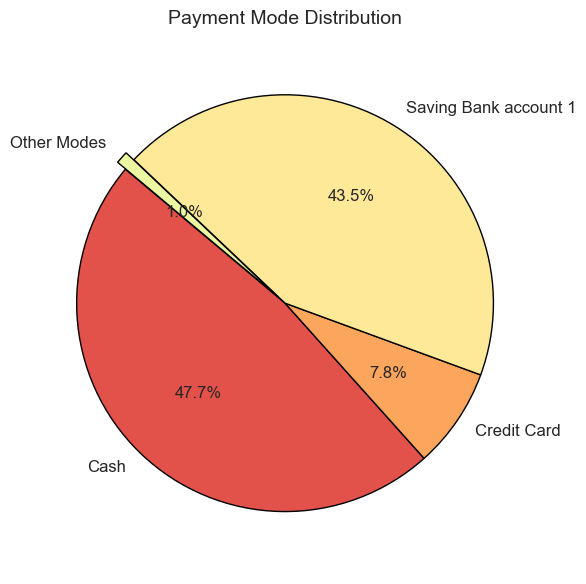

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))  # Bigger size for better readability

# Define primary modes to keep separate
main_modes = ['Cash', 'Credit Card', 'Saving Bank account 1']

# Count all modes
mode_counts = df['Mode'].value_counts()

# Group other modes under "Other Modes"
grouped_counts = mode_counts.copy()
grouped_counts['Other Modes'] = grouped_counts[~grouped_counts.index.isin(main_modes)].sum()
grouped_counts = grouped_counts[main_modes + ['Other Modes']]

# Extract labels and sizes
labels = grouped_counts.index
sizes = grouped_counts.values

# Explode only "Other Modes" slightly for emphasis
explode = [0.05 if label == 'Other Modes' else 0 for label in labels]

# Plot pie chart
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Spectral'),
    explode=explode,
    shadow=False,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Payment Mode Distribution", fontsize=14)
plt.axis('equal')  # Keep it a circle
plt.tight_layout()
plt.show()


### 🆚 6. Income vs Expense Comparison

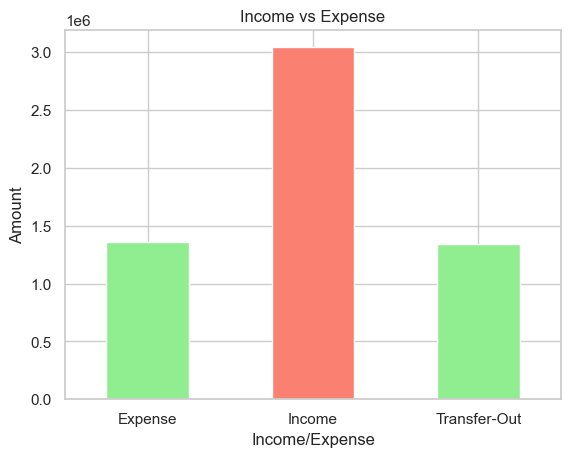

In [8]:
df.groupby('Income/Expense')['Amount'].sum().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Income vs Expense")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()

### 📆 7. Number of Transactions Per Month

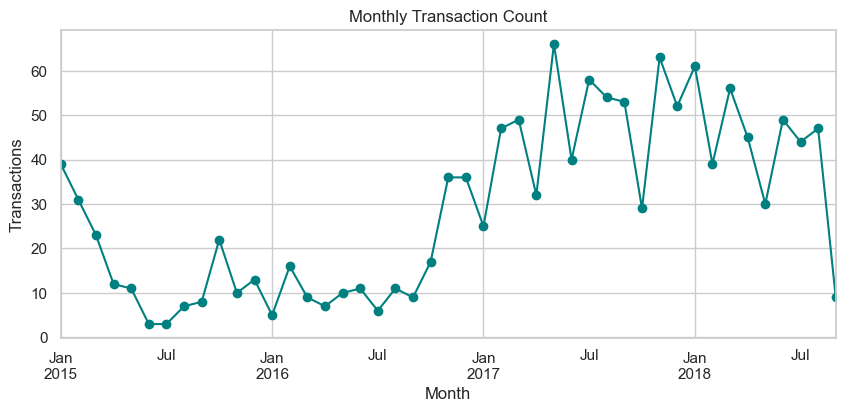

In [9]:
monthly_count = df.groupby('Month').size()
plt.figure(figsize=(10,4))
monthly_count.plot(marker='o', color='teal')
plt.title("Monthly Transaction Count")
plt.ylabel("Transactions")
plt.grid(True)
plt.show()

### 🧾 8. Average Expense Per Day

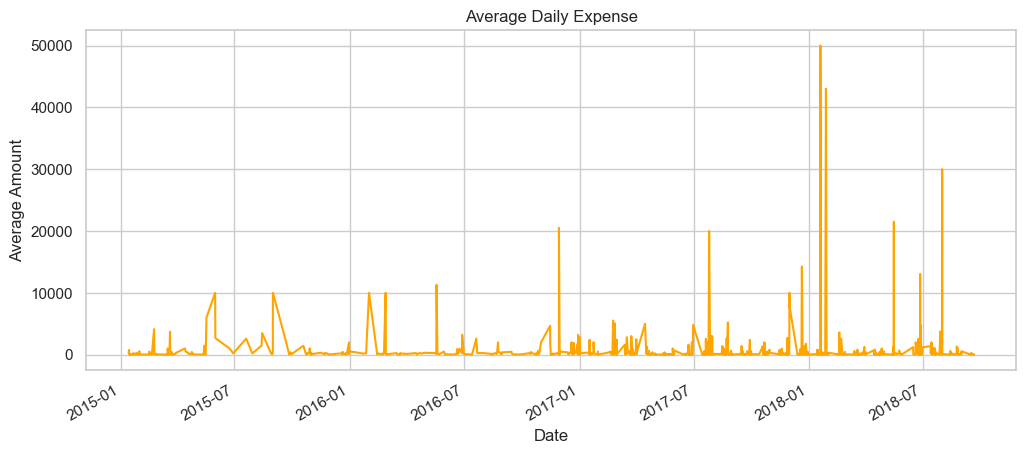

In [10]:
avg_expense = df[df['Income/Expense']=='Expense'].groupby('Date')['Amount'].mean()
plt.figure(figsize=(12,5))
avg_expense.plot(color='orange')
plt.title("Average Daily Expense")
plt.ylabel("Average Amount")
plt.grid(True)
plt.show()

### 📂 9. Distribution of Expense Amounts

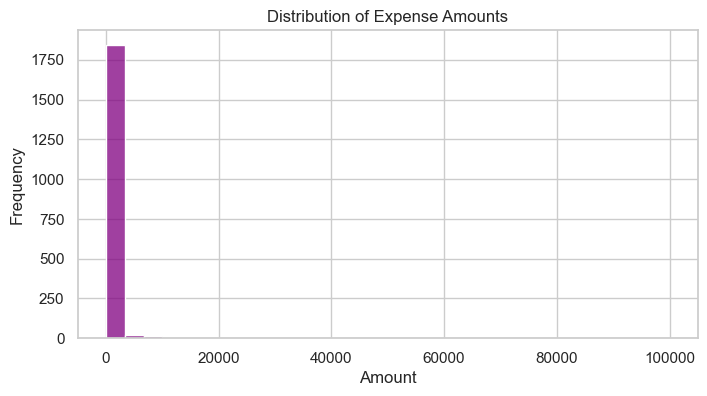

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Income/Expense']=='Expense']['Amount'], bins=30, color='purple')
plt.title("Distribution of Expense Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

### 🌈 10. Boxplot of Expenses by Category

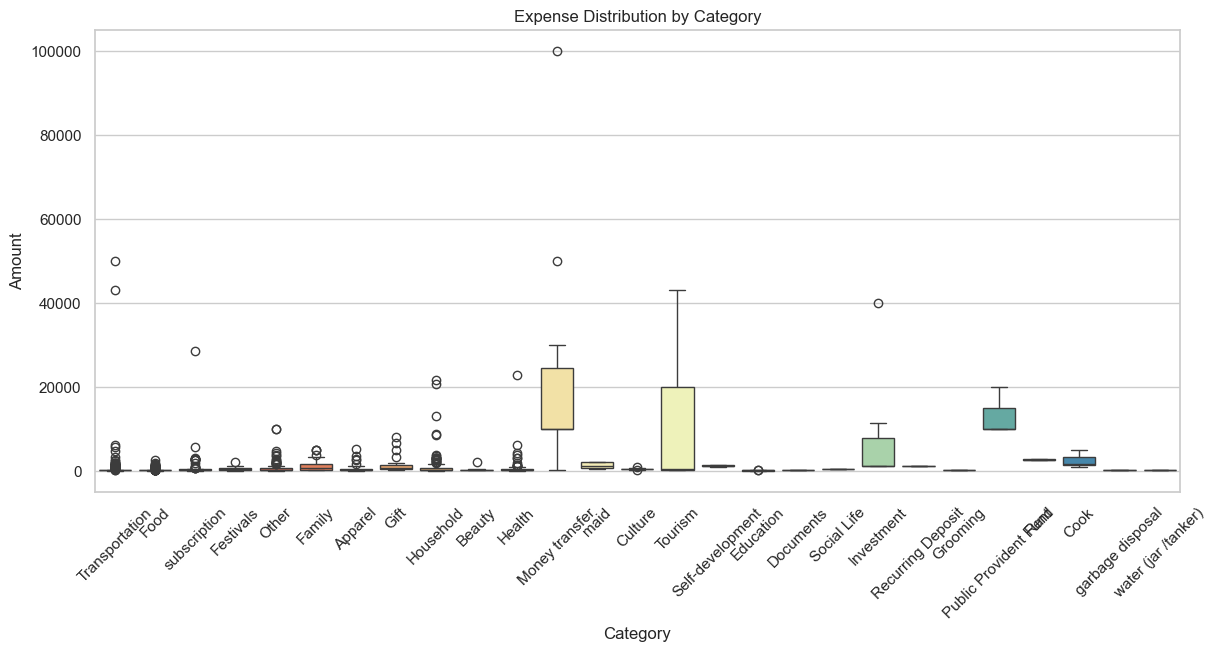

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['Income/Expense']=='Expense'], x='Category', y='Amount', palette='Spectral')
plt.xticks(rotation=45)
plt.title("Expense Distribution by Category")
plt.show()

### 📅 11. Expense by Weekday

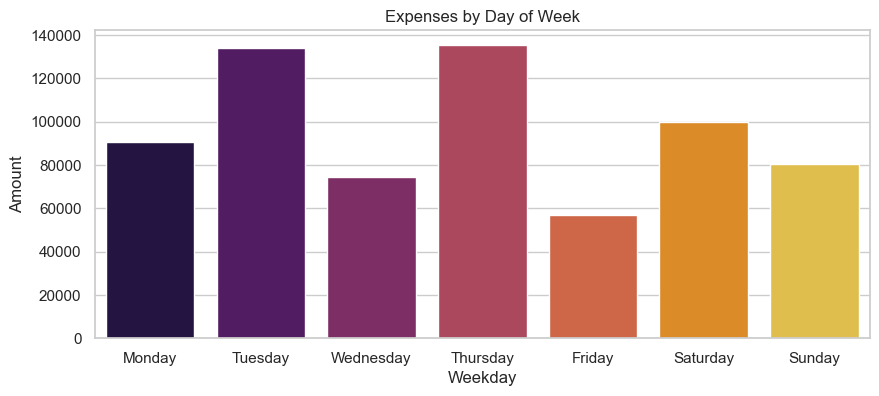

In [20]:
df['Weekday'] = df['Date'].dt.day_name()
weekly = df[df['Income/Expense']=='Expense'].groupby('Weekday')['Amount'].sum().reindex(
['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(10,4))
sns.barplot(x=weekly.index, y=weekly.values, palette='inferno')
plt.title("Expenses by Day of Week")
plt.ylabel("Amount")
plt.show()

### 🔥 12. Heatmap: Category vs Mode

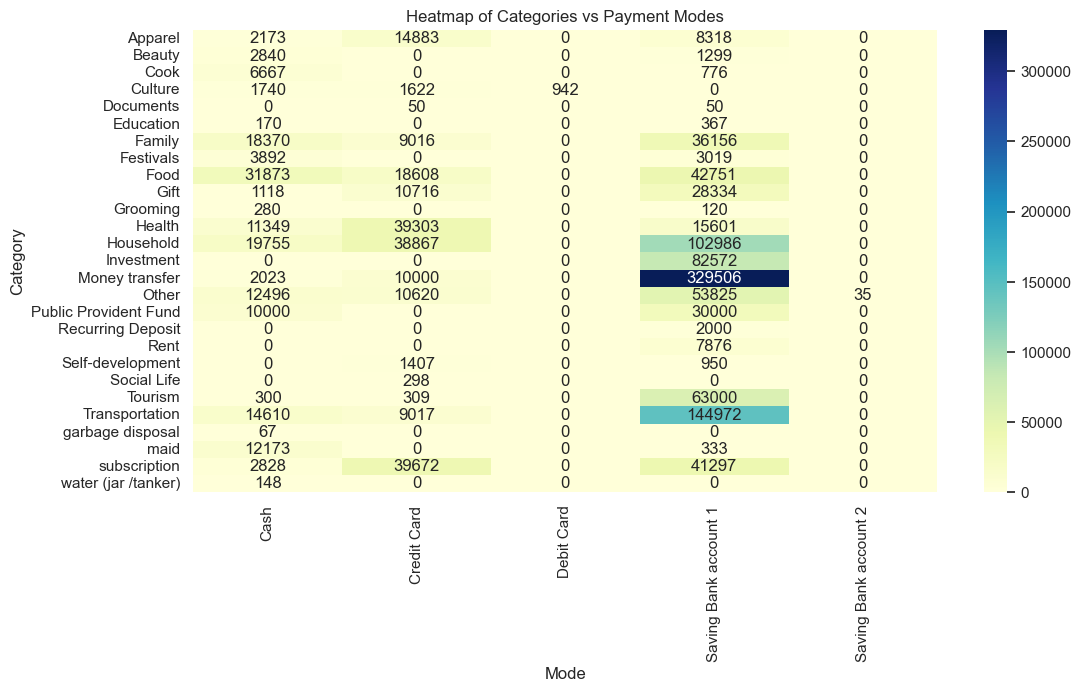

In [14]:
pivot = pd.pivot_table(df[df['Income/Expense']=='Expense'], values='Amount', index='Category', columns='Mode', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Heatmap of Categories vs Payment Modes")
plt.show()

### 🏷️ 13. Most Frequent Notes

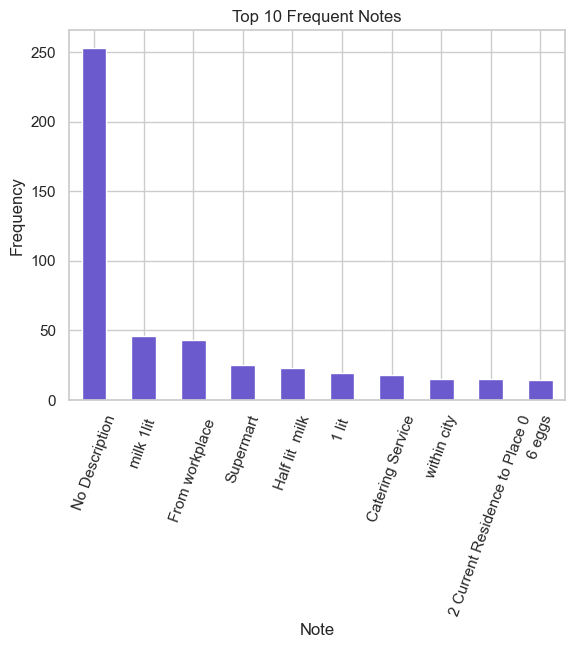

In [33]:
df['Note'].value_counts().head(10).plot(kind='bar', color='slateblue')

plt.title("Top 10 Frequent Notes")
plt.ylabel("Frequency")
plt.xticks(rotation=70)
plt.show()

### 📉 14. Cumulative Expense Over Time

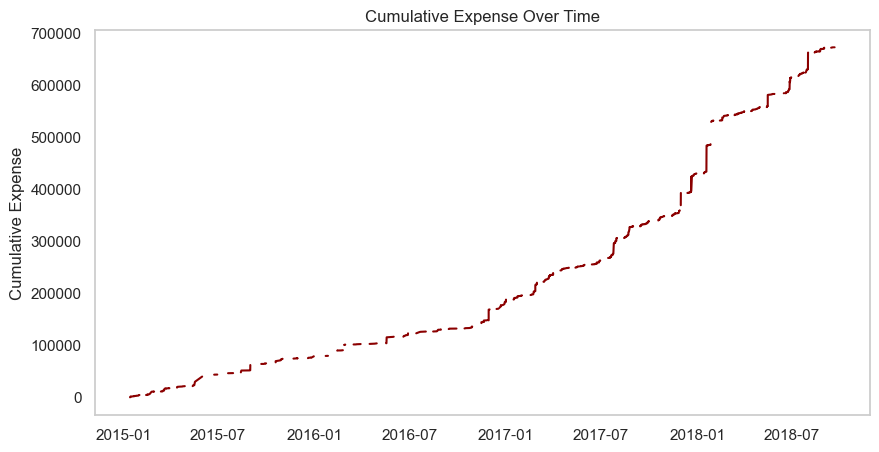

In [16]:
df['Cumulative'] = df[df['Income/Expense']=='Expense'].sort_values('Date')['Amount'].cumsum()
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Cumulative'], color='darkred')
plt.title("Cumulative Expense Over Time")
plt.ylabel("Cumulative Expense")
plt.grid()
plt.show()

### 🔠 15. Transactions by Mode and Type

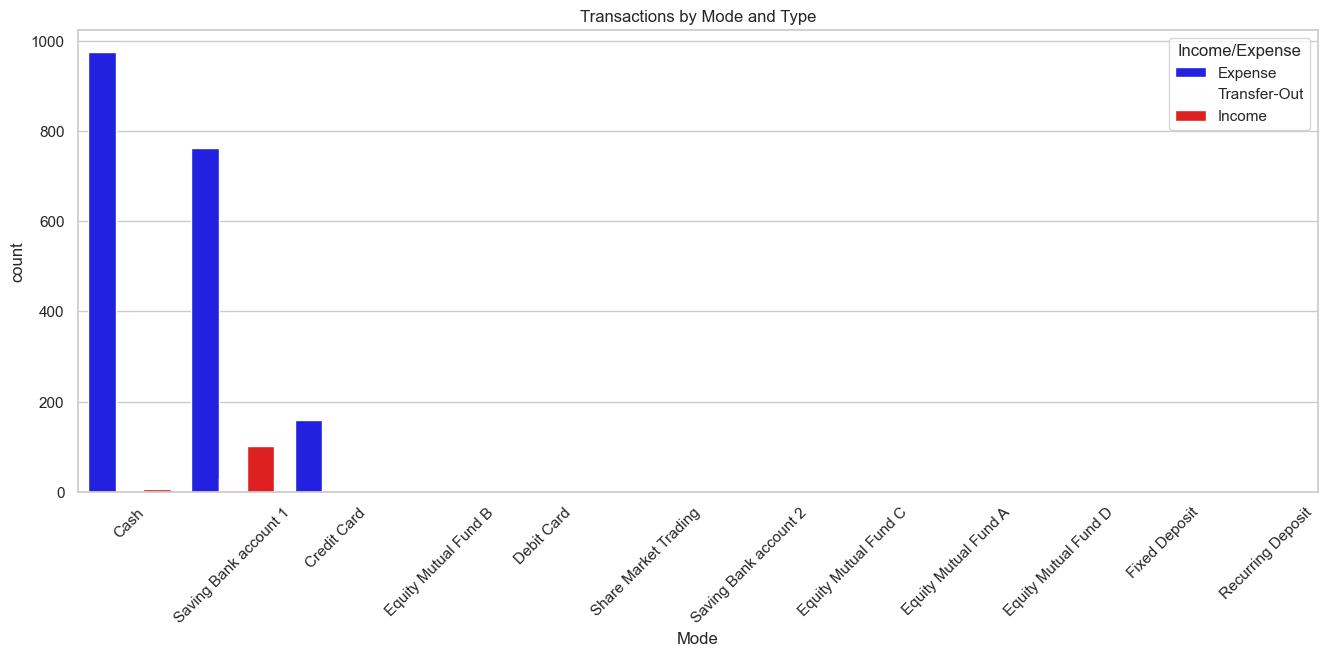

In [34]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x='Mode', hue='Income/Expense', palette='seismic')
plt.title("Transactions by Mode and Type")
plt.xticks(rotation=45)
plt.show()

### 🧮 16. Average Expense per Category

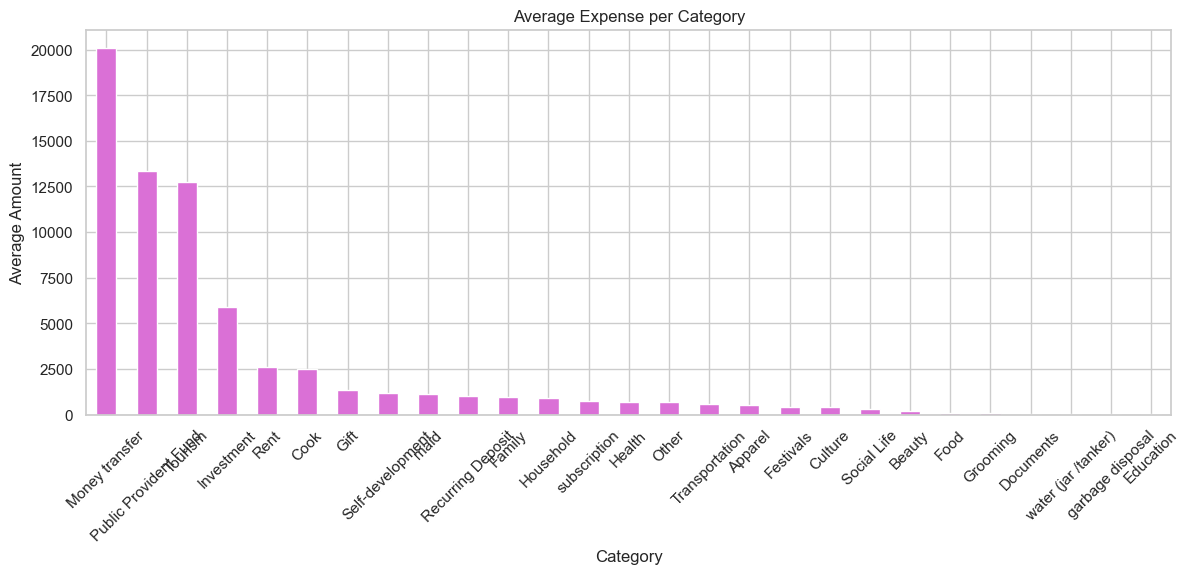

In [27]:
avg_cat = df[df['Income/Expense']=='Expense'].groupby('Category')['Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,5))
avg_cat.plot(kind='bar', color='orchid')
plt.title("Average Expense per Category")
plt.ylabel("Average Amount")
plt.xticks(rotation=45)
plt.show()

### 🟢 17. Scatterplot of Expenses Over Time

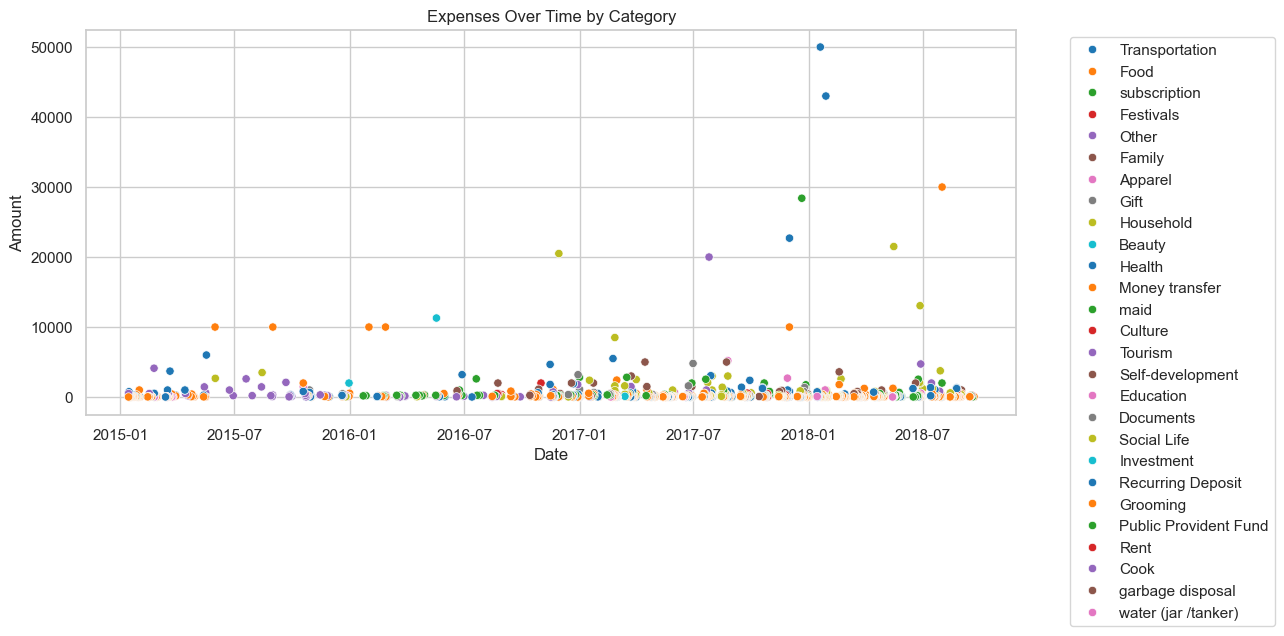

In [19]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df[df['Income/Expense']=='Expense'], x='Date', y='Amount', hue='Category', palette='tab10')
plt.title("Expenses Over Time by Category")
plt.ylabel("Amount")
plt.xlabel("Date")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()